In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [4]:
data=pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems that there are no missing values in our data. Great, let's see the distribution of data:

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

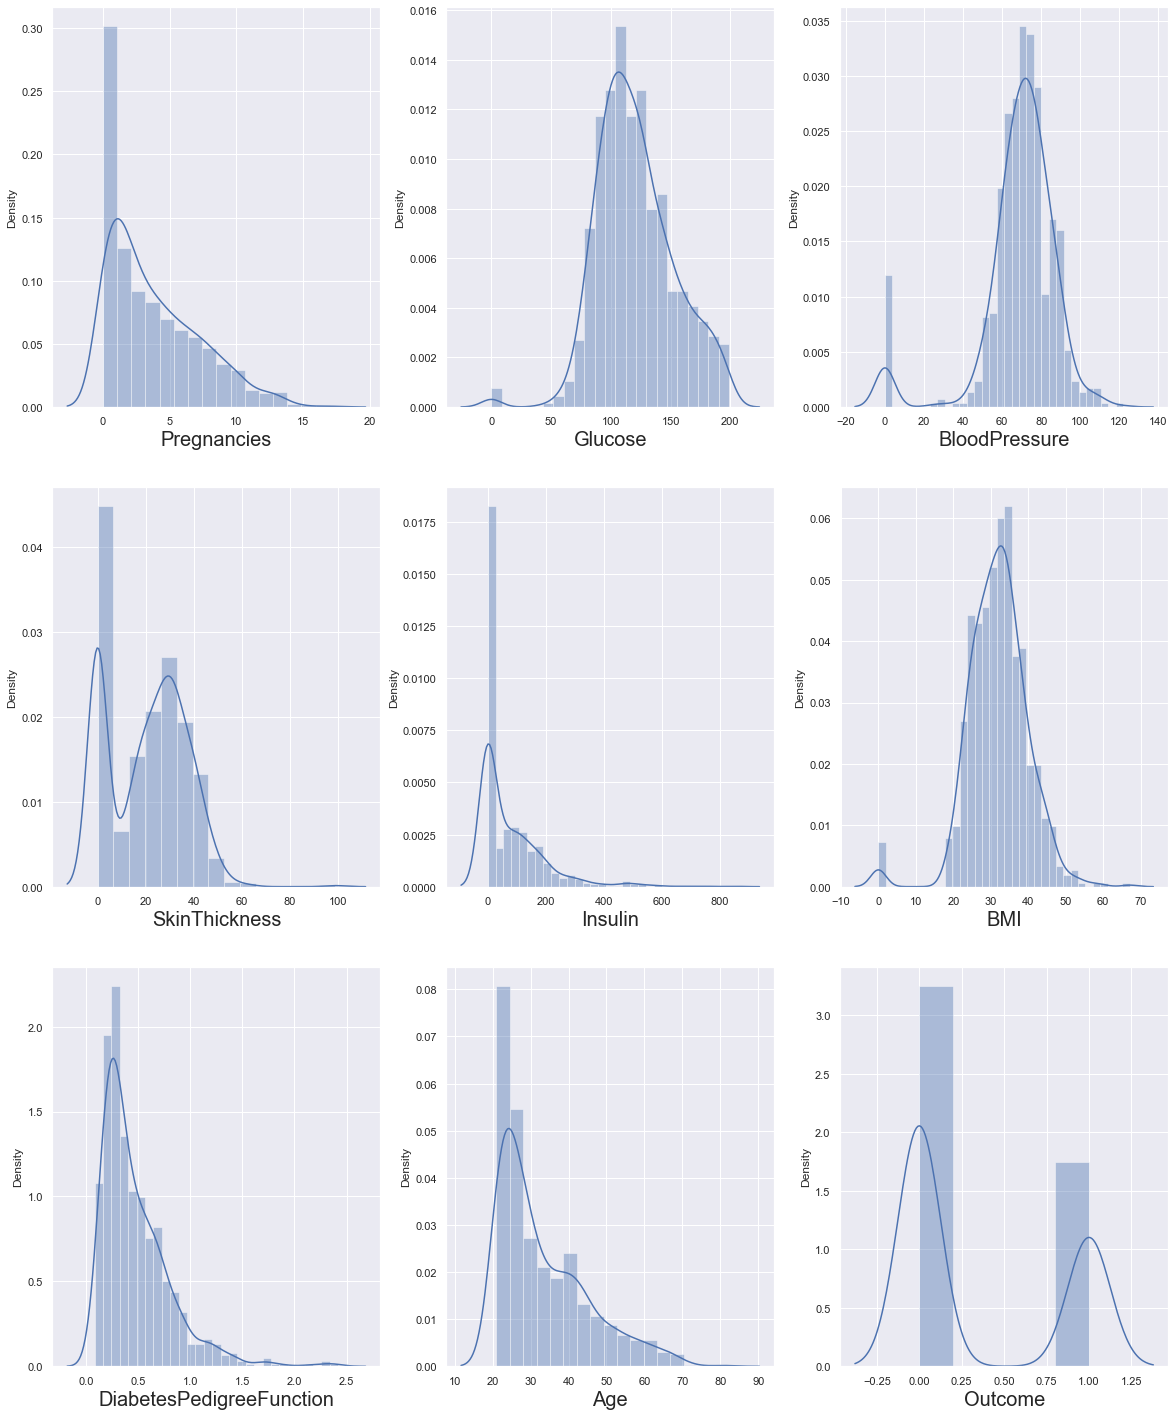

In [7]:
#let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9: #as there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [8]:
# replacing zero values with the mean of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

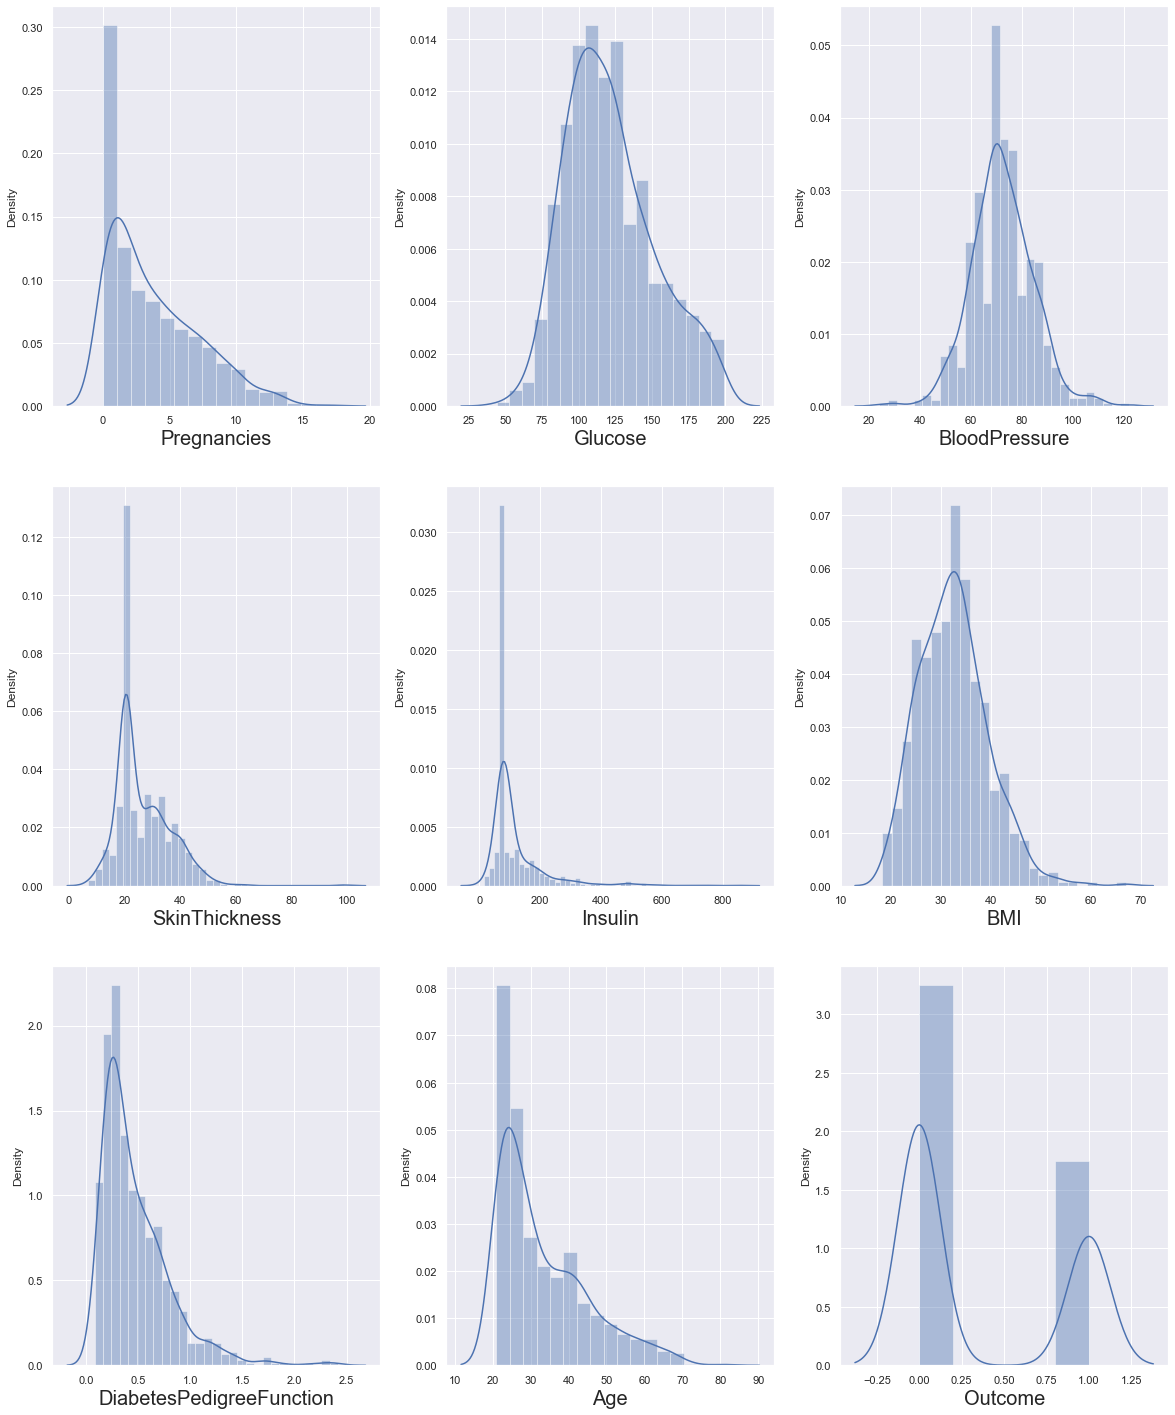

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9: # as there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.
Let's deal with them.

<AxesSubplot:>

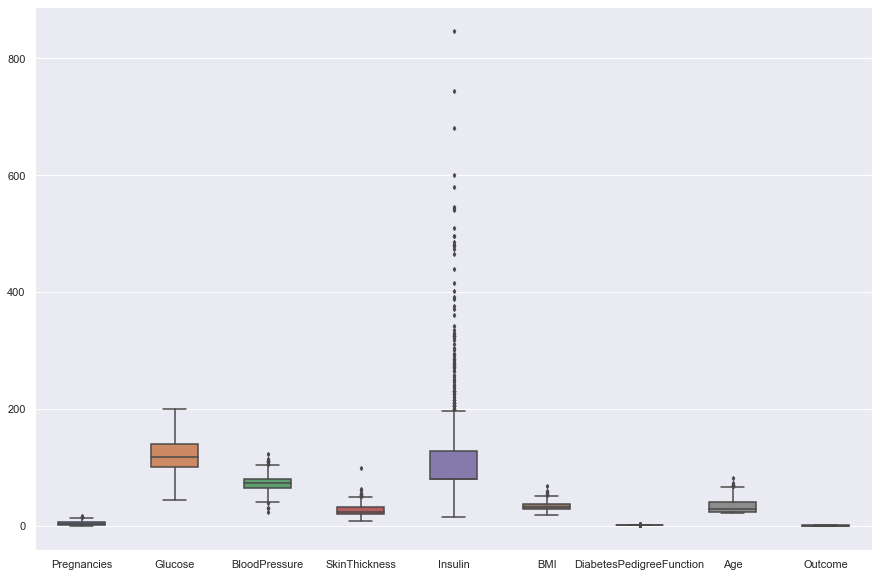

In [11]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [12]:
# we are removing the top 2% data from the Pregnancies column
q=data['Pregnancies'].quantile(0.98)
data_cleaned=data[data['Pregnancies']<q]

# we are removing the top 1% data from the BloodPressure column
q=data['BloodPressure'].quantile(0.99)
data_cleaned=data[data['BloodPressure']<q]

# we are removing the top 1% data from the SkinThickness column
q=data['SkinThickness'].quantile(0.99)
data_cleaned=data[data['SkinThickness']<q]

# we are removing the top 5% data from the Insulin column
q=data['Insulin']
data_cleaned=data[data['Insulin']<q]

# we are removing the top 1% data from the BMI column
q=data['BMI'].quantile(0.99)
data_cleaned=data[data['BMI']<q]

# we are removing the top 1% data from the DiabetesPedigreeFunction column
q=data['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned=data[data['DiabetesPedigreeFunction']<q]

# we are removing the top 1% data from the Age column
q=data['Age'].quantile(0.99)
data_cleaned=data[data['Age']<q]


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

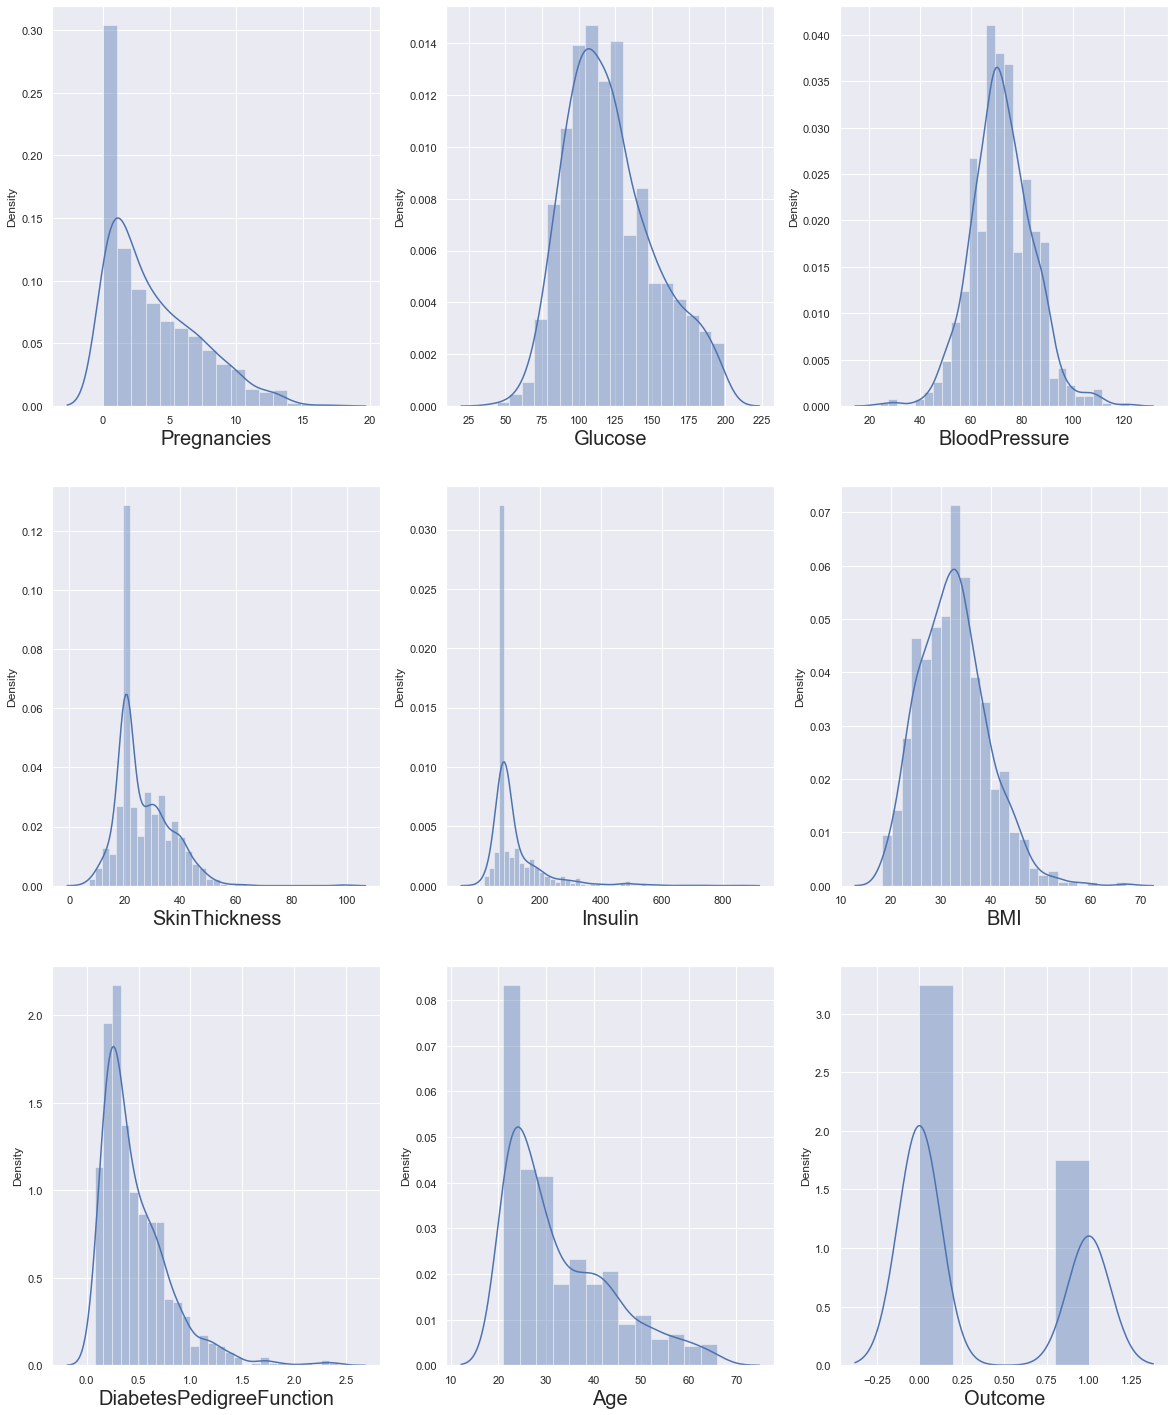

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data_cleaned:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.


In [18]:
X=data_cleaned.drop(columns=['Outcome'])
Y=data_cleaned['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-

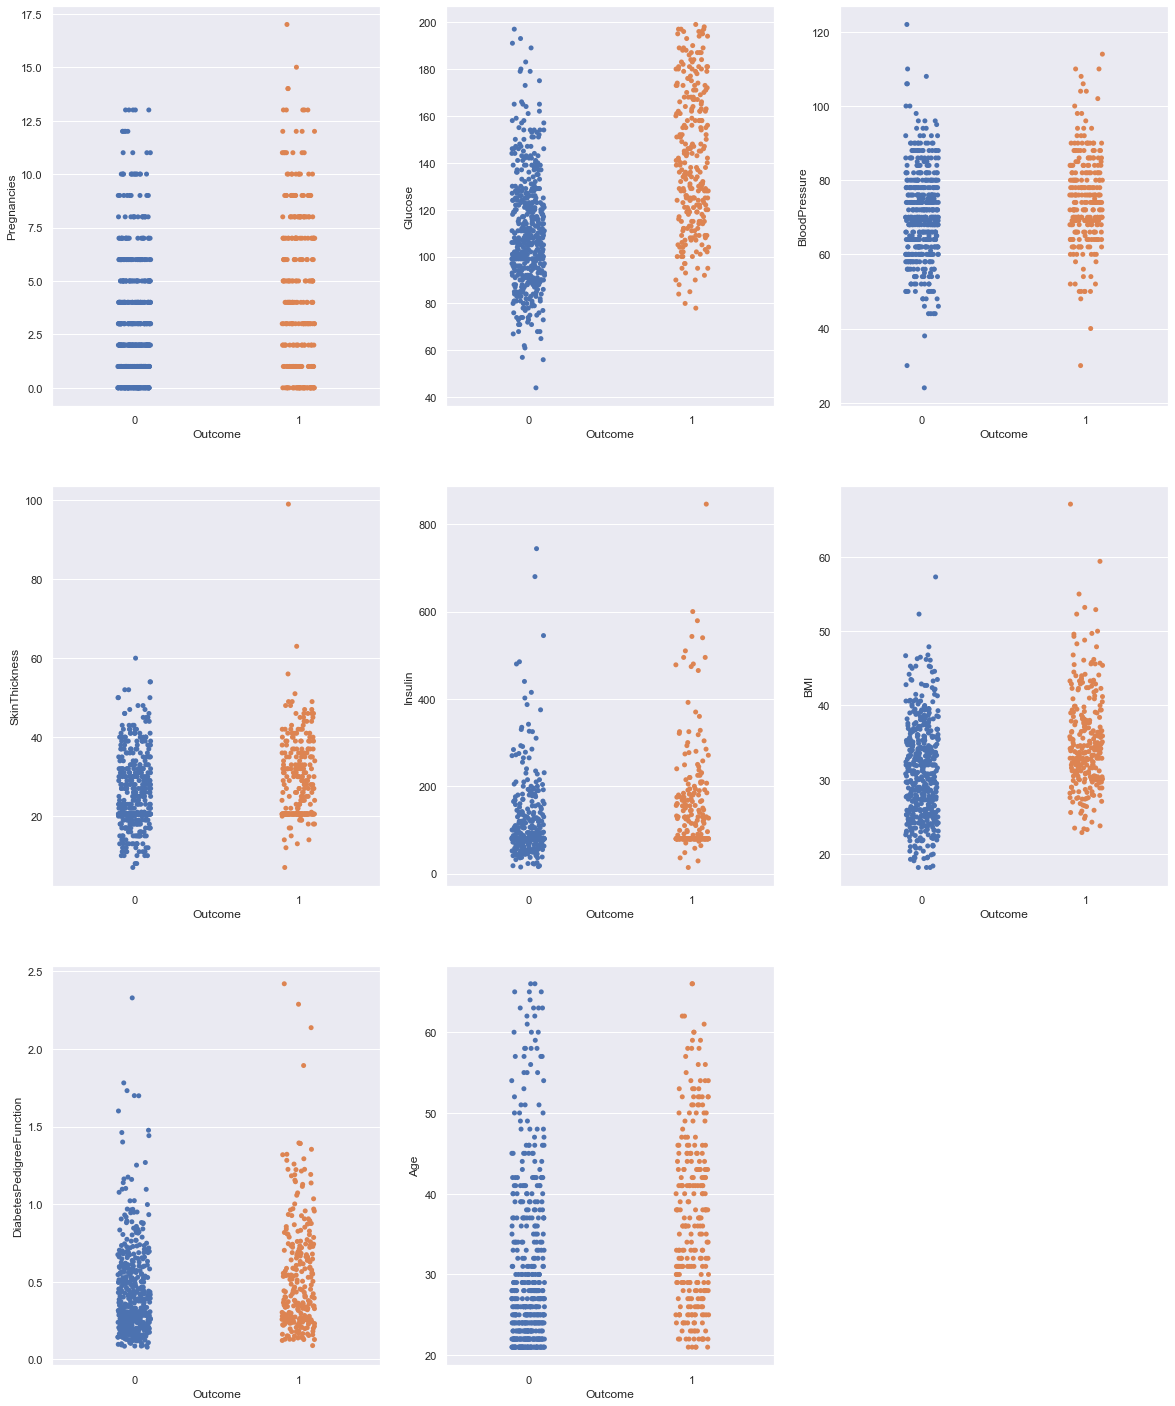

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.show()    

Great!! Let's proceed by checking multicollinearity in the dependent variables.
Before that, we should scale our data. Let's use the standard scaler for that.

In [21]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [22]:
X_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [23]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.484572,Pregnancies
1,1.354580,Glucose
2,1.247898,BloodPressure
3,1.455095,SkinThickness
4,1.264776,Insulin
5,1.551161,BMI
6,1.058847,DiabetesPedigreeFunction
7,1.680199,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
Before that, let's split our data in test and training set.


In [24]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [25]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [26]:
import pickle
# Writing different model files to file
with open('Downloads\Logistic-regression_final\Logistic-regression_final\modelForPrediction.sav','wb') as f:
    pickle.dump(log_reg,f)
    
with open('Downloads\Logistic-regression_final\Logistic-regression_final\sandardScalar.sav','wb') as f:
    pickle.dump(scalar,f)

Let's see how well our model performs on the test data set.


In [27]:
y_predict=log_reg.predict(x_test)

In [28]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.7631578947368421

In [29]:
# Confusion Matrix
conf_mat=confusion_matrix(y_test,y_predict)
conf_mat

array([[106,  17],
       [ 28,  39]], dtype=int64)

In [30]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [31]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7631578947368421

In [32]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8617886178861789

In [33]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7910447761194029

In [34]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8249027237354086

In [36]:
# Area Under Curve
auc = roc_auc_score(y_test, y_predict)
auc

0.7219390850624925

**ROC**

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

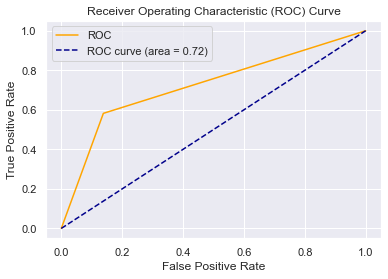

In [39]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### What is the significance of Roc curve and AUC?

In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. 
Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.


#### Advantages of Logisitic Regression

* It is very simple and easy to implement.
* The output is more informative than other classification algorithms
* It expresses the relationship between independent and dependent variables
* Very effective with linearly seperable data

#### Disadvantages of Logisitic Regression

* Not effective with data which are not linearly seperable 
* Not as powerful as other classification models
* Multiclass classifications are much easier to do with other algorithms than logisitic regression
* It can only predict categorical outcomes




